**Environment setup**
---

This is the state of the environment, using `pip freeze`, includes everything:
```
absl-py==0.9.0
appdirs==1.4.3
asn1crypto==1.3.0
astor==0.8.0
astroid==2.1.0
attrs==19.3.0
backcall==0.1.0
bleach==3.1.4
blinker==1.4
cachetools==3.1.1
certifi==2020.4.5.1
cffi==1.14.0
chardet==3.0.4
click==7.1.1
colorama==0.4.1
cryptography==2.8
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
distlib==0.3.0
entrypoints==0.3
filelock==3.0.12
gast==0.2.2
google-auth==1.13.1
google-auth-oauthlib==0.4.1
google-pasta==0.2.0
grpcio==1.27.2
h5py==2.10.0
idna==2.9
imageio==2.8.0
importlib-metadata==1.5.0
ipykernel==5.2.1
ipython==7.13.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
isort==4.3.4
jedi==0.17.0
Jinja2==2.11.1
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.1.3
jupyter-console==6.1.0
jupyter-contrib-core==0.3.3
jupyter-contrib-nbextensions==0.5.1
jupyter-core==4.6.3
jupyter-highlight-selected-word==0.2.0
jupyter-http-over-ws==0.0.8
jupyter-latex-envs==1.4.4
jupyter-nbextensions-configurator==0.4.1
Keras==2.3.1
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.0
keras-vis==0.4.1
kiwisolver==1.2.0
lazy-object-proxy==1.3.1
lxml==4.5.0
Markdown==3.1.1
MarkupSafe==1.1.1
matplotlib==3.2.1
mccabe==0.6.1
mistune==0.8.4
mkl-fft==1.0.15
mkl-random==1.1.0
mkl-service==2.3.0
nbconvert==5.6.1
nbformat==5.0.4
networkx==2.4
notebook==6.0.3
numpy==1.18.3
oauthlib==3.1.0
opencv-python==4.2.0.34
opt-einsum==3.1.0
pandocfilters==1.4.2
parso==0.7.0
pickleshare==0.7.5
Pillow==7.1.1
prometheus-client==0.7.1
prompt-toolkit==3.0.5
protobuf==3.11.4
pyasn1==0.4.8
pyasn1-modules==0.2.7
pycparser==2.20
Pygments==2.6.1
PyJWT==1.7.1
pylint==2.2.2
pyOpenSSL==19.1.0
pyparsing==2.4.7
pyreadline==2.1
pyrsistent==0.16.0
PySocks==1.7.1
python-dateutil==2.8.1
PyWavelets==1.1.1
pywin32==227
pywinpty==0.5.7
PyYAML==5.3.1
pyzmq==19.0.0
qtconsole==4.7.2
QtPy==1.9.0
requests==2.23.0
requests-oauthlib==1.3.0
rsa==4.0
scikit-image==0.16.2
scipy==1.4.1
Send2Trash==1.5.0
six==1.12.0
tensorboard==2.1.0
tensorflow==2.1.0
tensorflow-estimator==2.1.0
termcolor==1.1.0
terminado==0.8.3
testpath==0.4.4
tornado==6.0.4
traitlets==4.3.3
urllib3==1.25.8
virtualenv==20.0.8
wcwidth==0.1.9
webencodings==0.5.1
Werkzeug==0.14.1
widgetsnbextension==3.5.1
win-inet-pton==1.1.0
wincertstore==0.2
wrapt==1.11.1
zipp==3.1.0
```

**Prepare Images**
---




Unzip the images using the in-built ZipFile utility class.

In [0]:
from zipfile import ZipFile

ZipFile('fruits.zip', 'r').extractall()

After the images have been extracted, the correct file paths need to be declared and stored. They will be used to generate the image batches directly from the directories.

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
# Increase training data using ImageDataGenerator which adds small changes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

GDRIVEPATH=''
base_dir = GDRIVEPATH+'fruits'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

With the images and their paths, the batches generators for both the training and validation data are created. This is done by first insantiating the `ImageDataGenerator` class (imported from `keras.preprocessing.image`) with the required augmentations parameters (`rescale`, `horizontal_flip`, `vertical_flip`, `brightness_range` and `fill_mode`). After which the `flow_from_directory` method is used with the specified `directory`, `target_size`, `batch_size`, and `class_mode` parameters to create the train and validation image batches generators.

In [3]:
# Dataset augmentation using ImageDataGenerator.
# rescale = multiply the image data with 255, using `./` instead of just `/` because the expected result is a double.
# horizontal_flip = randomly flip images on the x axis
# vertical_flip = randomly flip images on the y axis
# brightness_range = randomly increase the brightness with the specified values 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[1, 1.5]
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[1, 1.5]
)

# Defining the `classes` parameter helps to encode the labels which are then decoded from the predictions.
# `class_mode` is categorical as opposed to `binary` because there are more than 2 classes.
# `target_size` represents the actual height and width of the images.
# `batch_size` set to 64, which sends 64 images with each batch.
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (150, 226),
    batch_size = 64,
    classes = ['apples', 'bananas', 'cantaloupe melon', 'crenshaw melon', 'grapes', 'oranges', 'pineapples'],
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    directory = validation_dir,
    target_size = (150, 226),
    batch_size = 32,
    classes = ['apples', 'bananas', 'cantaloupe melon', 'crenshaw melon', 'grapes', 'oranges', 'pineapples'],
    class_mode = 'categorical'
)

Found 830 images belonging to 7 classes.
Found 376 images belonging to 7 classes.


**Verify prepared images**
---



Verify that the image data generators work as intended by getting a batch and showing some of the images.

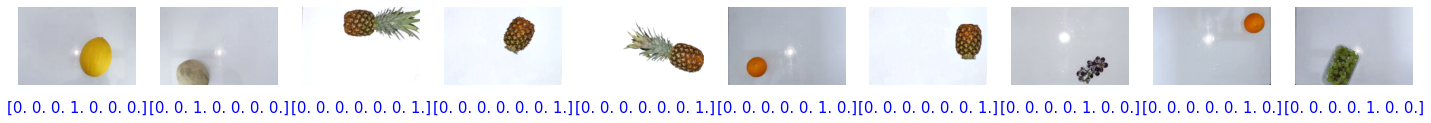

In [29]:
# Get a batch of the augmented images
trainImgs, trainLabels = next(validation_generator)

# Create the figure to hold the images
fig = plt.figure(figsize=(25,17))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Add 10 images to the figure, along with their encoded labels.
for i in range(10):
    img = trainImgs[i]
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(trainLabels[i]), fontsize=15, color='blue', ha='center', transform=ax.transAxes)
    ax.imshow(img)

**Construct Network**
---



Create the network model and add the relevant layers with the required hyperparameters. More details in report regarding how this specific model has been reached.

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a sequential model which will hold the required feature extraction and classifier layers.
model = models.Sequential()

# Add the layers for extracting features from the images (the eyes).
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), input_shape=(150, 226, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(4, 4), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(4, 4), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu', name='last_conv_layer'))
model.add(layers.MaxPooling2D((2, 2)))
# Flatten the resulted data, before passing it to the layers used for classification.
model.add(layers.Flatten())
# Randomly set some of the input to 0, used to reduce overfitting 
# when training using small dataset over many epochs.
model.add(layers.Dropout(0.4))
# Add the classifier layers, with the final output layer that will store the predictions.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax', name='predictions'))

After the network has been created, it needs to be compiled with a specific `loss` function (`categorical_crossentropy` in our case), an `optimizer` (using Root Mean Square back propagation) with a learning rate of 0.0004 (default is 0.0001), and the `metrics` used for calculating the performance of the network (accuracy is used). After compiling it, a `summary` of the model is printed.

In [6]:
# Compile the 
model.compile(
    loss='categorical_crossentropy', 
    optimizer = optimizers.RMSprop(learning_rate=1e-4), 
    metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 226, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 226, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 113, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 113, 64)       32832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 113, 64)       65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 56, 128)       7

With the network compiled and the image data generators, the model can be trained. Everything has been built up for this stage which uses the data from the `train_generator` and the `validation_generator` to train the network over a specific number of iterations (epochs, in this case 1000). The `steps_per_epoch` is set to 10 (calculated from 652/64 = ~10), while the validation_steps is set to 5 (calculated from 322/32 = ~10/2), validation_steps has been set to cover only half during each epoch because this way there will be more unknown validation data between epochs (images are randomly picked by the generator).
The callbacks `es` and `mc` are created and added when fiting the model. The `es` callback is used to stop training if `val_loss` does not improve during 20 epochs (`patience`). While the `mc` callback saves the model which has the best `val_loss` score.

In [7]:
# Callback used to stop training if `val_loss` does not improve during 20 epochs (`patience`)
es = EarlyStopping(monitor="val_loss", patience=25, verbose=1, mode="min")
# Callback used to save the model every time `val_loss` improves, 
# mode set to `min` because `val_loss` reduces while improving (I believe auto also works).
mc = ModelCheckpoint(filepath=GDRIVEPATH + "fruits_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Start training the network, with the relevant data from the generators, 
# and callbacks used to save the best model and stop the training if no improvement seen during 20 epochs
history = model.fit(
    x = train_generator,
    epochs = 1000,
    steps_per_epoch = 10,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 5,
    callbacks=[es, mc]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 5 steps
Epoch 1/1000
 9/10 [==========================>...] - ETA: 0s - loss: 1.9590 - acc: 0.2309
Epoch 00001: val_loss improved from inf to 1.85086, saving model to fruits_model.h5
10/10 [==============================] - 8s 845ms/step - loss: 1.9538 - acc: 0.2320 - val_loss: 1.8509 - val_acc: 0.3562
Epoch 2/1000
 9/10 [==========================>...] - ETA: 0s - loss: 1.9047 - acc: 0.2317
Epoch 00002: val_loss improved from 1.85086 to 1.80971, saving model to fruits_model.h5
10/10 [==============================] - 2s 245ms/step - loss: 1.9020 - acc: 0.2367 - val_loss: 1.8097 - val_acc: 0.3562
Epoch 3/1000
 9/10 [==========================>...] - ETA: 0s - loss: 1.8855 - acc: 0.2561
Epoch 00003: val_loss improved from 1.80971 to 1.68945, saving model to fruits_model.h5
10/10 [==============================] - 2s 244ms/step - loss: 1.8764 - acc: 0.2555 - val_loss: 1.6895 - val_acc: 0.3938
Epoch 4/1000


**Training History**
---

The history of training the network can be seen by plotting the `acc` with `val_accuracy`, and `loss` with `val_loss`. This way we can visually see if there is any overfitting happening.

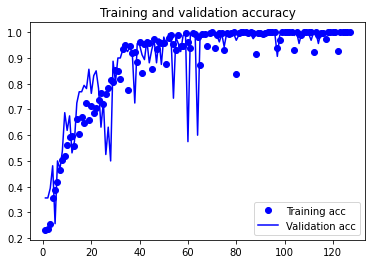

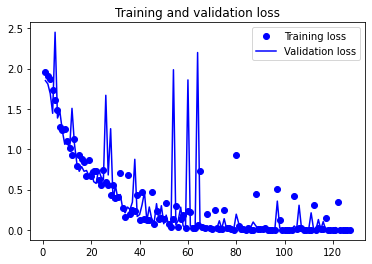

In [8]:
# Get the `acc`, `val_acc`, `loss`, `val_loss` from the trained network history.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the value for the plot X axis, based on the number of epochs
epochs = range(1, len(acc) + 1)

# Plot both the `acc` and `val_acc` together to see if any plateau is reached.
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot the `loss` and `val_loss` together to see if and where overfitting occurs.
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Test & Validate**
---

Finally after the network has been trained with a high performance (accuracy) and high certainty (low loss), some visualization is needed to verify that the network uses data which is related to the fruit, and not something totally unexpected. This is done by using something called GRADient weighted Class Activation Maps (GRAD-CAM), which is basically a heatmap overlaid on top of the test image to see what location of the image has been used to make the prediction.

In [0]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K

First the test image needs to be loaded and converted to an array to be used with the model. Loading done using the `load_img` function, while conversion to array is done with the `img_to_array` function.

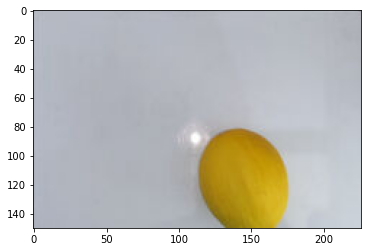

In [22]:
# image_path = GDRIVEPATH + 'fruits/test/apples/apple.2.jpg'
# image_path = GDRIVEPATH + 'fruits/test/bananas/banana.1.jpg'
# image_path = GDRIVEPATH + 'fruits/test/cantaloupe melon/cantaloupe.1.jpg'
image_path = GDRIVEPATH + 'fruits/test/crenshaw melon/crenshaw.1.jpg'
# image_path = GDRIVEPATH + 'fruits/test/oranges/orange.1.jpg'
# image_path = GDRIVEPATH + 'fruits/test/pineapples/pineapple.6.jpg'
# image_path = GDRIVEPATH + 'fruits/test/grapes/grapes.4.jpg'

img = image.load_img(image_path, target_size=(150, 226), interpolation='bicubic')
img_tensor = image.img_to_array(img)/255.
img_tensor = np.expand_dims(img_tensor, axis=0)

plt.imshow(img_tensor[0])

The loaded image can be used to make the prediction of what fruit type it is, using the saved model. During this stage the gradients required for creating the heatmap are also computed.

In [0]:
# Load the model from the file
model_path = GDRIVEPATH + 'fruits_model.h5'
fruits_model = load_model(model_path)

# Get the last convolutional layer which will have the final features
last_conv_layer = fruits_model.get_layer('last_conv_layer')

# Create the heatmap model with the input, last convoutional layer output, and model output.
# The heatmap model will be used to compute the gradients.
heatmap_model = models.Model(
    [fruits_model.input],
    [last_conv_layer.output, fruits_model.output]
)

# Using GradientTape() to compute the gradients via automatic differentiation.
with tf.GradientTape() as tape:
  # Run the image tensor through the model to get the outputs from the last convoluted layer 
  # and the predictions from the model output
  (convOutputs, predictions) = heatmap_model(img_tensor)
  loss = predictions[:, np.argmax(predictions[0])]
  grads = tape.gradient(loss, convOutputs)
  pooled_grads = K.mean(grads, axis = (0, 1, 2))

With the gradients computed, the heatmap can be created by getting the average of the gradient values, and using them as weights.

In [0]:
# Get the average of the gradient values, and use them as weights 
# with the filters from convOutputs.
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, convOutputs), axis = -1)[0]

heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
  max_heat = 1e-8
heatmap /= max_heat

# Scale the resulted values to range [0, 255] and convert to unsigned 8-bit integer
heatmap = np.uint8(255 * heatmap)

# Resize the heatmap to match that of the original image size
heatmap = cv2.resize(heatmap, (img_tensor[0].shape[1], img_tensor[0].shape[0]))
# Apply colormap
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

Finally the heatmap can be visualized, along with the predicted label.

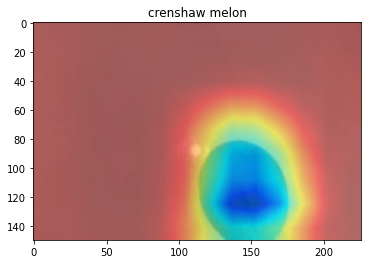

In [25]:
# Define encoded classes, to use with the predictions
classes = ['apple', 'banana', 'cantaloupe melon', 'crenshaw melon', 'grapes', 'orange', 'pineapple']
# Load image in OpenCV array format using `cv2.imread`
original = cv2.imread(image_path)
original = cv2.resize(original, (226, 150))
# Overlay heatmap to original image using `cv2.addWeighted`
overlayed = cv2.addWeighted(original, 0.5, heatmap, 1 - 0.5, 0)

# Display image with heatmap and prediction
plt.title(classes[np.argmax(predictions[0])])

plt.imshow(overlayed)